<a href="https://colab.research.google.com/github/jeong1suk/Capstone_ElectricCar/blob/yeonjeong/%EB%A7%88%ED%81%AC%EC%A0%95%ED%99%95%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
import numpy as np
import argparse
import imutils
from google.colab.patches import cv2_imshow
from ctypes import resize
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
plt.style.use('dark_background')

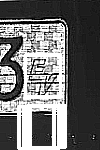

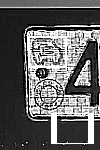

In [9]:
#이미지 불러오기

template = cv2.imread('/content/drive/MyDrive/testvideo.PNG')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.resize(template, (700,400))

ev = cv2.imread('/content/drive/MyDrive/ev.png')
ev = cv2.cvtColor(ev, cv2.COLOR_BGR2GRAY)
ev = cv2.resize(ev,(35,41))

car = cv2.imread('/content/drive/MyDrive/car.png')
car = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)
car = cv2.resize(car,(37, 30))

# 자동차 마크 크롭

car_img = template.copy()

car_img = template[150:300, 100:200]


# EV 마크 크롭

ev_img = template.copy()
ev_img = template[150:300,500:600]


#이미지 샤프닝

kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])
ev_img = cv2.filter2D(ev_img,-1,kernel_sharpening)
car_img = cv2.filter2D(car_img,-1,kernel_sharpening)

#templateMatch _ ev 마크

result = cv2.matchTemplate(ev_img,ev,cv2.TM_CCOEFF_NORMED)

loc = np.where(result >= 0.25)

for pt in zip(*loc[::-1]):
    cv2.rectangle(ev_img,pt,(pt[0]+35,pt[1]+42),(255,0,0),2)

cv2_imshow(ev_img)

#templateMatch_ car 마크
result = cv2.matchTemplate(car_img,car,cv2.TM_CCOEFF_NORMED)

loc = np.where(result > 0.25)

for pt in zip(*loc[::-1]):
    cv2.rectangle(car_img,pt,(pt[0]+37,pt[1]+30),(255,0,0,2))

cv2_imshow(car_img)